Lab 2: Avocado Prices

Data set up

In [110]:
import numpy as np
import pandas as pd
from plotnine import *

In [111]:
avocado = pd.read_csv("/content/avocado.csv")
avocado.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


The data for avocados talks about the sales about per bag and size of individual avocados. It is seperated out into small, large, and x-large avocados. It also shows what the prices is per year and region as well as what type of avocado is sold.

In [112]:
avocado_clean = avocado.dropna(axis=0)
avocado_clean.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [113]:
avocado_clean = avocado_clean.rename(columns={"4046": "smalls", "4225": "larges", "4770" : "xlarges"})
avocado_clean.head()

,date,average_price,total_volume,smalls,larges,xlarges,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [114]:
avocado_clean['geography'].unique()

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York',
       'Northeast', 'Northern New England', 'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Plains', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'South Central', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'Total U.S.', 'West', 'West Tex/New Mexico'], dtype=object)

In [115]:
avocado_clean["majorreg"] = avocado_clean["geography"].map({
    'West Tex/New Mexico': 'West Tex/New Mexico',
    'West': 'West',
    'Southeast': 'Southeast',
    'Plains' : 'Plains',
    'Midsouth': 'Midsouth',
    'Northeast': 'Northeast',
    'South Central': 'South Central',
    'Northern New England' : 'Northern New England',
    'New York' : 'New York',
    'California' : 'California',
    'Great Lakes' : 'Great Lakes',
    'Midsouth' : 'Midsouth',
    'South Atlantic' : 'South Atlantic',
    'South' : 'South',
})

avocado_clean["minorreg"] = avocado_clean["geography"].map({
    'Albany' : 'Albany',
    'Atlanta' :  'Atlanta',
    'Baltimore/Washington' : 'Baltimore/Washington',
    'Boise' : 'Boise',
    'Boston' : 'Boston',
       'Buffalo/Rochester' : 'Buffalo/Rochester',
    'Charlotte' : 'Charlotte',
    'Chicago' : 'Chicago',
       'Cincinnati/Dayton' : 'Cincinnati/Dayton',
    'Columbus' : 'Columbus',
    'Dallas/Ft. Worth' : 'Dallas/Ft. Worth',
    'Denver' : 'Denver',
       'Detroit' : 'Detroit',
    'Grand Rapids': 'Grand Rapids',
    'Harrisburg/Scranton' : 'Harrisburg/Scranton',
       'Hartford/Springfield' : 'Hartford/Springfield',
    'Houston' : 'Houston',
    'Indianapolis' :  'Indianapolis',
    'Jacksonville' : 'Jacksonville',
       'Las Vegas' : 'Las Vegas',
    'Los Angeles' : 'Los Angeles',
    'Louisville' :  'Louisville',
    'Miami/Ft. Lauderdale' : 'Miami/Ft. Lauderdale',
    'Nashville' : 'Nashville',
    'New Orleans/Mobile' :  'New Orleans/Mobile',
    'Orlando' :'Orlando',
    'Philadelphia' :  'Philadelphia',
       'Phoenix/Tucson' : 'Phoenix/Tucson',
    'Pittsburgh' : 'Pittsburgh',
    'Portland' : 'Portland',
       'Raleigh/Greensboro' : 'Raleigh/Greensboro',
    'Richmond/Norfolk' : 'Richmond/Norfolk',
    'Roanoke' : 'Roanoke',
    'Sacramento' : 'Sacramento',
       'San Diego' : 'San Diego',
    'San Francisco' : 'San Francisco',
    'Seattle' : 'Seattle',
    'South Carolina' : 'South Carolina',
    'Spokane' :'Spokane',
    'St. Louis' : 'St. Louis',
    'Syracuse': 'Syracuse',
       'Tampa' : 'Tampa',
})
avocado_clean.head()

,date,average_price,total_volume,smalls,larges,xlarges,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,majorreg,minorreg
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,NaN,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,NaN,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,NaN,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,NaN,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,NaN,Baltimore/Washington


question 3

In [116]:
avo2017= avocado_clean[(avocado_clean["year"] == 2017) & (avocado_clean["type"] == "organic")]

result =avo2017.groupby("majorreg")[["smalls"]].sum()
result1 = result.sort_values(by="smalls", ascending=False)
result1.head(1)

,smalls
majorreg,
West,1870206.29


### west has the greatest amount of sales for small avocados per region at 1,870,206 sales


question 4

In [70]:
avocado_clean['date'] = pd.to_datetime(avocado_clean['date'])
avocado_clean['Year'] = avocado_clean['date'].dt.year
avocado_clean['Month'] = avocado_clean['date'].dt.month
avocado_clean['Day'] = avocado_clean['date'].dt.day
avocado_clean.head()

,date,average_price,total_volume,smalls,larges,xlarges,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,majorreg,minorreg,Year,Month,Day,month
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,NaN,Albany,2015,1,4,january
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,NaN,Albany,2015,1,4,january
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,NaN,Atlanta,2015,1,4,january
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,NaN,Atlanta,2015,1,4,january
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,NaN,Baltimore/Washington,2015,1,4,january


In [71]:
avocado_clean["month"] = avocado_clean["Month"].map({
    1: 'january',
    2: 'febuary',
    3: 'march',
    4 : 'april',
    5: 'may',
    6: 'june',
    7: 'july',
    8 : 'august',
    9 : 'september',
    10 : 'october',
    11 : 'november',
    12 : 'december',
})
result =avocado_clean.groupby("month")[["total_volume"]].sum()
result1 = result.sort_values(by="total_volume", ascending=False)
result1.head(1)

,total_volume
month,
may,3.276512e+09


May has the greatest amount of total volume out of all months

question 5

In [72]:
result =avocado_clean.groupby("minorreg")[["total_volume"]].sum()
result1 = result.sort_values(by="total_volume", ascending=False)
result1 = result1.idxmax()
print(result1)

total_volume    Los Angeles
dtype: object


Los angles has the highest avocado sales in the metro regions

In [73]:
topmetro = result1.head(5).index.tolist()
topmetro

['total_volume']

In [74]:
avofil= avocado_clean[(avocado_clean["minorreg"] == 'Los Angeles') | (avocado_clean["minorreg"] == 'Dallas/Ft. Worth') | (avocado_clean["minorreg"] == 'Houston') | (avocado_clean["minorreg"] == 'Phoenix/Tucson') | (avocado_clean["minorreg"] == 'Denver')]
avofil.head()

,date,average_price,total_volume,smalls,larges,xlarges,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,majorreg,minorreg,Year,Month,Day,month
22,2015-01-04,0.74,1086363.97,612795.80,374420.68,9817.28,89330.21,54563.33,34760.08,6.80,conventional,2015,Dallas/Ft. Worth,NaN,Dallas/Ft. Worth,2015,1,4,january
23,2015-01-04,1.35,9895.96,4634.70,1647.92,0.00,3613.34,3613.34,0.00,0.00,organic,2015,Dallas/Ft. Worth,NaN,Dallas/Ft. Worth,2015,1,4,january
24,2015-01-04,0.99,668086.00,117454.09,429518.41,5553.60,115559.90,67894.33,47661.52,4.05,conventional,2015,Denver,NaN,Denver,2015,1,4,january
25,2015-01-04,1.42,22480.07,3199.35,6916.72,7.56,12356.44,1076.67,11279.77,0.00,organic,2015,Denver,NaN,Denver,2015,1,4,january
36,2015-01-04,0.71,1062990.62,506426.58,436347.57,4378.92,115837.55,90299.85,25537.70,0.00,conventional,2015,Houston,NaN,Houston,2015,1,4,january


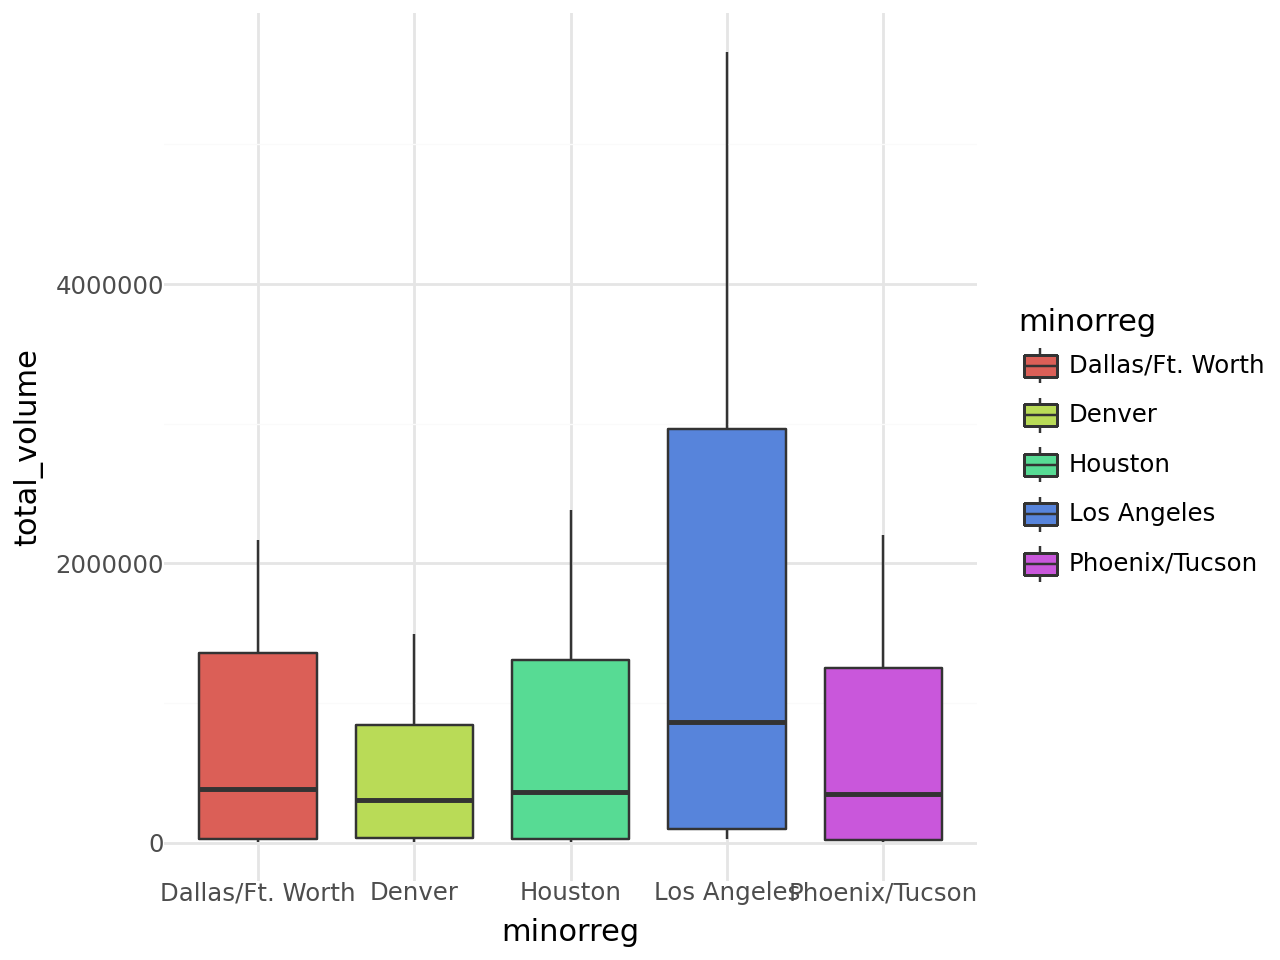

In [75]:
(ggplot(avofil, aes(x = "minorreg", y = "total_volume", fill = "minorreg"))
+ geom_boxplot()
+theme_minimal()
)

question 6


In [76]:
avocal= avocado_clean[(avocado_clean["minorreg"] == 'Los Angeles') | (avocado_clean["minorreg"] == 'San Diego') | (avocado_clean["minorreg"] == 'Sacramento') |
 (avocado_clean["minorreg"] == 'San Francisco')]
avocal.head()

,date,average_price,total_volume,smalls,larges,xlarges,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,majorreg,minorreg,Year,Month,Day,month
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,NaN,Los Angeles,2015,1,4,january
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,NaN,Los Angeles,2015,1,4,january
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,NaN,Sacramento,2015,1,4,january
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,NaN,Sacramento,2015,1,4,january
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,NaN,San Diego,2015,1,4,january


question 7


In [77]:
avopivot = avocal.pivot(index = ["minorreg", 'date'], columns = "type", values = "average_price")
avopivot = avopivot.reset_index()
avopivot.head()

type,minorreg,date,conventional,organic
0,Los Angeles,2015-01-04,0.85,1.25
1,Los Angeles,2015-01-11,0.85,1.08
2,Los Angeles,2015-01-18,0.89,1.29
3,Los Angeles,2015-01-25,0.96,1.23
4,Los Angeles,2015-02-01,0.74,1.12


In [78]:
avopivot["diff"] = (avopivot["organic"] - avopivot["conventional"])
avopivot.head()

type,minorreg,date,conventional,organic,diff
0,Los Angeles,2015-01-04,0.85,1.25,0.40
1,Los Angeles,2015-01-11,0.85,1.08,0.23
2,Los Angeles,2015-01-18,0.89,1.29,0.40
3,Los Angeles,2015-01-25,0.96,1.23,0.27
4,Los Angeles,2015-02-01,0.74,1.12,0.38


In [79]:
avopivot.groupby("minorreg")[["diff"]].describe()

type            diff                                                    
               count      mean       std   min   25%   50%     75%   max
minorreg                                                                
Los Angeles    306.0  0.527778  0.188143  0.07  0.40  0.53  0.6700  1.21
Sacramento     306.0  0.578497  0.270029 -0.09  0.36  0.54  0.7775  1.43
San Diego      306.0  0.684510  0.211286  0.20  0.52  0.67  0.8300  1.41
San Francisco  306.0  0.718954  0.333801  0.02  0.46  0.71  0.9475  1.59

the city with the highest difference is San Francisco at 1.59

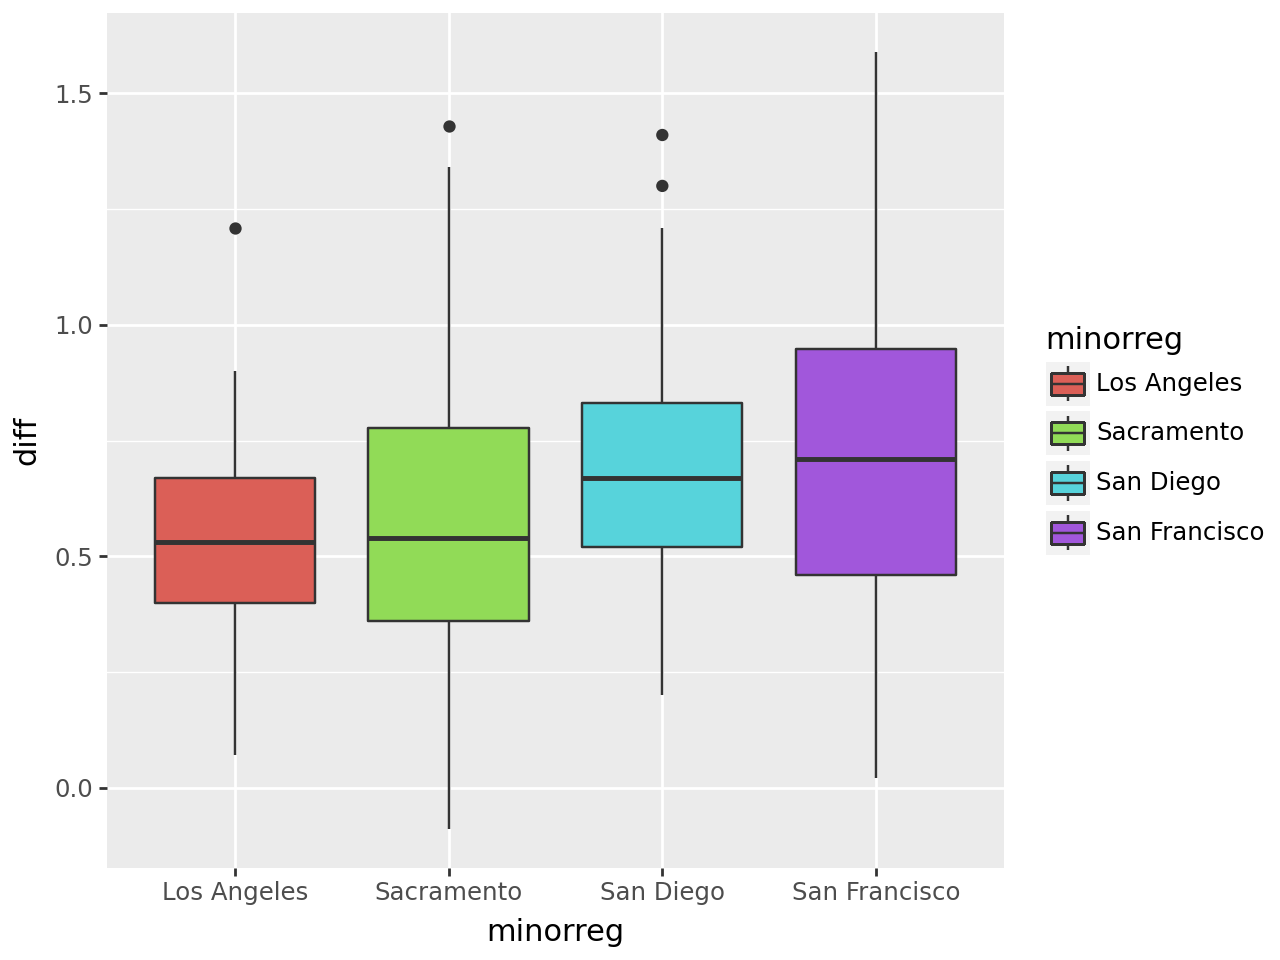

In [80]:
(ggplot(avopivot, aes(x = "minorreg", y = "diff", fill = "minorreg"))
+ geom_boxplot()
)

Question 8

In [81]:
avomelt = avocal.melt(id_vars=["minorreg", 'type', 'total_volume', 'year'], value_vars =["smalls", "larges", "xlarges"], var_name="size", value_name="sales")
avomelt.head()

,minorreg,type,total_volume,year,size,sales
0,Los Angeles,conventional,2682159.95,2015,smalls,1837999.65
1,Los Angeles,organic,54495.54,2015,smalls,47721.51
2,Sacramento,conventional,430138.88,2015,smalls,110693.69
3,Sacramento,organic,9213.49,2015,smalls,3727.52
4,San Diego,conventional,461607.33,2015,smalls,244152.26


In [82]:
avomelt['size']=  pd.Categorical(avomelt['size'], categories=["xlarges", "larges", "smalls"], ordered=True)
avosale= (avomelt.groupby(["minorreg", "size", 'type'], as_index= False).agg(average_sales=("sales", "mean")))
avosale.head()

<ipython-input-82-d2f6c920954e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,minorreg,size,type,average_sales
0,Los Angeles,xlarges,conventional,9.707364e+04
1,Los Angeles,xlarges,organic,6.035294e+00
2,Los Angeles,larges,conventional,4.438423e+05
3,Los Angeles,larges,organic,2.080422e+04
4,Los Angeles,smalls,conventional,1.172952e+06


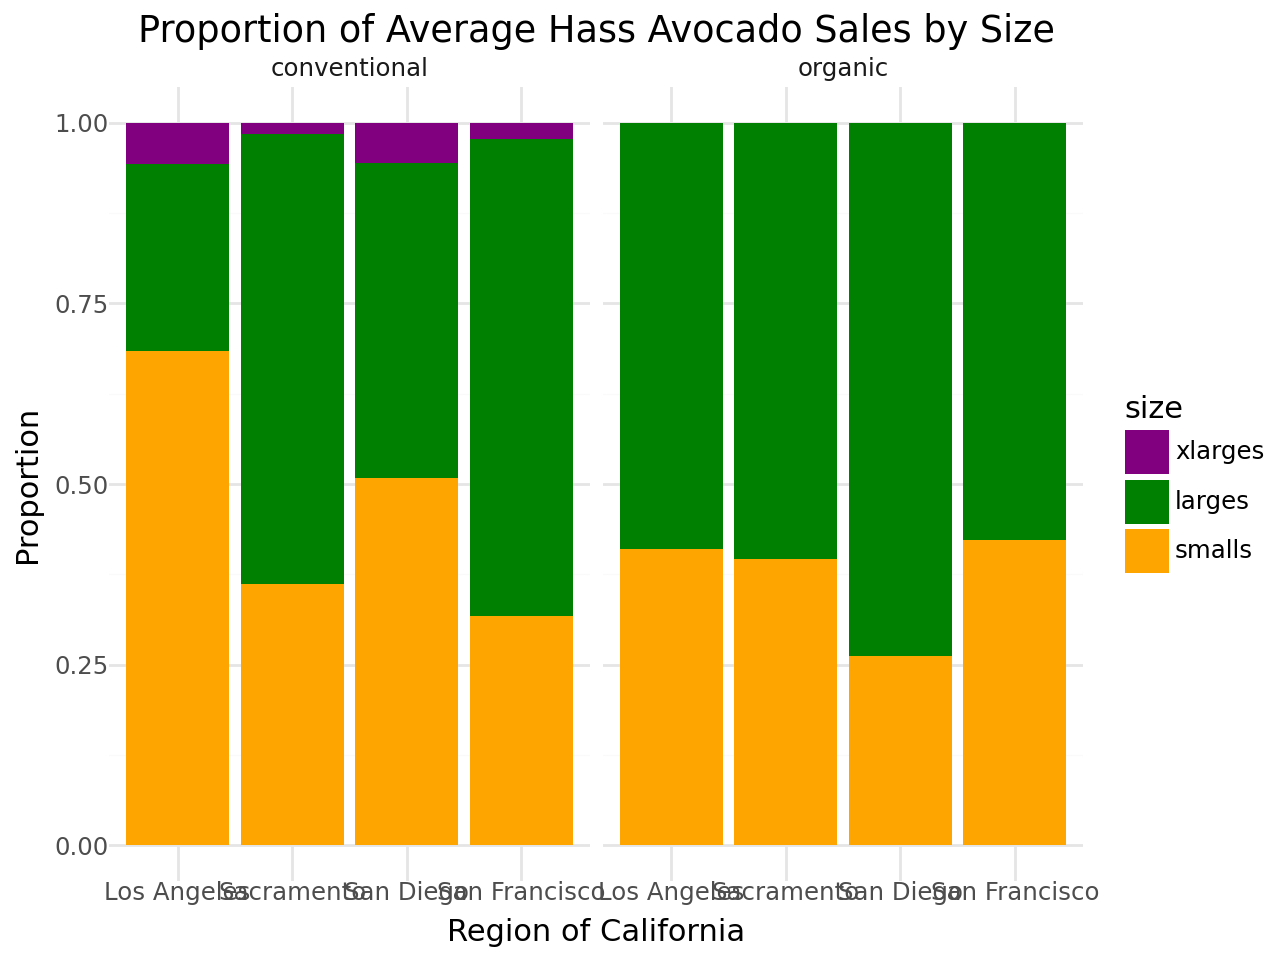

In [83]:
(ggplot(avosale, aes(x = "minorreg", y = "average_sales", fill = "size"))
+ geom_bar(stat="identity", position = "fill")
+ theme_minimal()
+ labs(x="Region of California", y="Proportion", title = "Proportion of Average Hass Avocado Sales by Size")
+scale_fill_manual(values = ["purple", "green", "orange"])
+ facet_wrap("~type")
)

Question 9

In [103]:
houseprices = pd.read_excel("/content/houseprices1.xlsx")
houseprices.head()

,minorreg,year,avgprice
0,Los Angeles,2015,502750
1,Los Angeles,2016,522520
2,Los Angeles,2017,577690
3,Los Angeles,2018,588140
4,Los Angeles,2019,641340


In [104]:
avoouter = avocal.merge(houseprices, on=["minorreg", "year"], how="outer")
avoouter.head()

,date,average_price,total_volume,smalls,larges,xlarges,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,majorreg,minorreg,Year,Month,Day,month,avgprice
0,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,NaN,Los Angeles,2015,1,4,january,502750
1,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,NaN,Los Angeles,2015,1,4,january,502750
2,2015-01-11,0.85,2713699.60,1786326.65,617233.39,58892.91,251246.65,222971.68,25111.74,3163.23,conventional,2015,Los Angeles,NaN,Los Angeles,2015,1,11,january,502750
3,2015-01-11,1.08,60232.63,52087.31,2063.44,0.00,6081.88,6081.88,0.00,0.00,organic,2015,Los Angeles,NaN,Los Angeles,2015,1,11,january,502750
4,2015-01-18,0.89,2800679.50,1925013.31,526106.80,59364.23,290195.16,260857.96,26671.18,2666.02,conventional,2015,Los Angeles,NaN,Los Angeles,2015,1,18,january,502750


In [105]:
avohouse = avoouter.groupby(["minorreg","year"])[["avgprice", "total_volume"]].mean()
avohouse

avgprice  total_volume
minorreg      year                         
Los Angeles   2015   502750.0  1.425199e+06
              2016   522520.0  1.568676e+06
              2017   577690.0  1.495105e+06
              2018   588140.0  1.540428e+06
              2019   641340.0  1.568871e+06
              2020   660000.0  1.826893e+06
Sacramento    2015   280000.0  2.113513e+05
              2016   385000.0  2.223368e+05
              2017   451450.0  2.187965e+05
              2018   429000.0  2.716389e+05
              2019   500000.0  2.502340e+05
              2020   539750.0  2.951080e+05
San Diego     2015   530000.0  2.556320e+05
              2016   568000.0  2.820966e+05
              2017   605000.0  2.565499e+05
              2018   618500.0  2.692326e+05
              2019   655000.0  2.861347e+05
              2020   900000.0  3.594122e+05
San Francisco 2015  1185000.0  3.792866e+05
              2016  1195000.0  3.993233e+05
              2017  1420000.0  3.950142e+05
              2018  1580000.0  5.018107e+05
              2019  1600000.0  4.742243e+05
              2020  1680000.0  5.507624e+05

In [106]:
avohouse = avohouse.reset_index()

In [107]:
avohouse

,minorreg,year,avgprice,total_volume
0,Los Angeles,2015,502750.0,1.425199e+06
1,Los Angeles,2016,522520.0,1.568676e+06
2,Los Angeles,2017,577690.0,1.495105e+06
3,Los Angeles,2018,588140.0,1.540428e+06
4,Los Angeles,2019,641340.0,1.568871e+06
5,Los Angeles,2020,660000.0,1.826893e+06
6,Sacramento,2015,280000.0,2.113513e+05
7,Sacramento,2016,385000.0,2.223368e+05
8,Sacramento,2017,451450.0,2.187965e+05
9,Sacramento,2018,429000.0,2.716389e+05


In [108]:
avohouse['year'] = avohouse['year'].astype(float)
avohouse.dtypes

,0
minorreg,object
year,float64
avgprice,float64
total_volume,float64


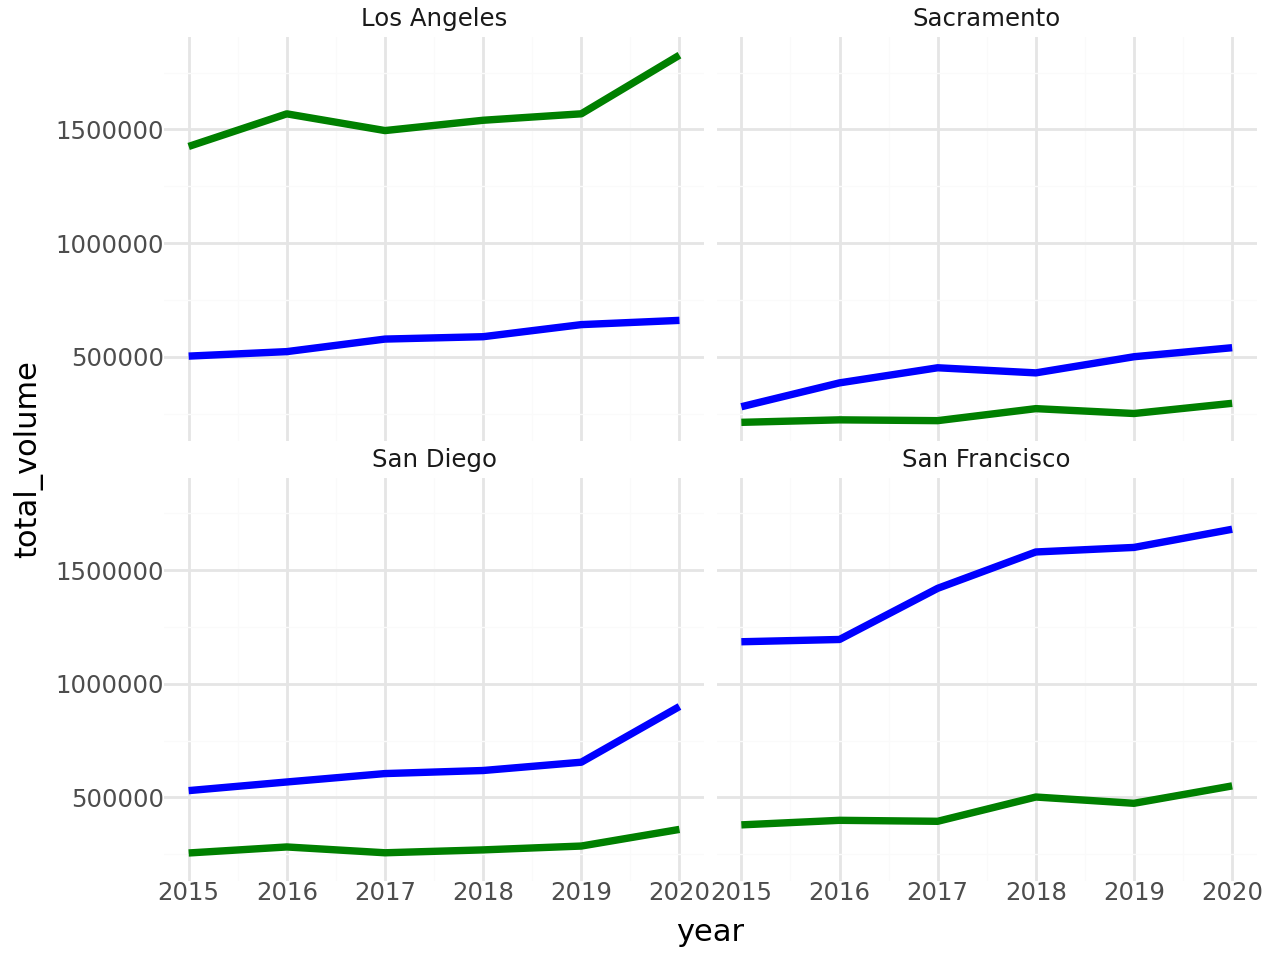

In [109]:
(ggplot(avohouse, aes(x="year"))
  + geom_line(aes(y= "total_volume"), color= "green", size= 1.5, linetype="solid")
  + geom_line(aes(y= "avgprice"), color= "blue", size= 1.5, linetype="solid")
  + facet_wrap("minorreg")
  + theme_minimal()
)

Athough the amount of sales per region of avocados are going it. It is going up at less of a rate than the home prices per region. Addionally it is total volume so that increase in volume for many people were as the cost for the houses is only for one person.